# Problema. 

Uma empresa de consultoria que atua em Big Data e Data Science deseja contratar Cientistas de Dados entre pessoas que obtenham aprovação em alguns cursos ministrados pela empresa. 

Muitas pessoas se inscrevem para o treinamento. A empresa quer saber quais desses candidatos realmente querem trabalhar para a empresa após o treinamento ou estão apenas fazendo o treinamento para retornarem ao mercado à procura de um novo emprego. O objetivo  é contratar os profissionais com perfil adequado, a fim de reduzir o custo e o tempo de  contratação, bem como a qualidade do treinamento ou planejamento dos cursos e categorização  dos candidatos. 

# Objetivo

Meu objetivo será realizar um extenso trabalho de análise nos dados, compreender como estão organizados, realizar limpeza e transformação dos dados conforme necessário, detectar eventuais padrões e diagnósticos e ao final emitir um parecer com um resumo sobre os dados.

Fonte de dados: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

In [151]:
# Imports necessarios para a analise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Carregamento e Análise Exploratória de Dados

In [152]:
df = pd.read_csv('dataset/aug_train.csv')

In [153]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [155]:
#Verificando dados duplicados
df.duplicated().sum()

0

In [156]:
#Verificando dados ausentes
null_df = df.isna().sum().reset_index()
null_df.rename(columns = {0: 'Total'}, inplace = True)
null_df

,index,Total
0,enrollee_id,0
1,city,0
2,city_development_index,0
3,gender,4508
4,relevent_experience,0
5,enrolled_university,386
6,education_level,460
7,major_discipline,2813
8,experience,65
9,company_size,5938


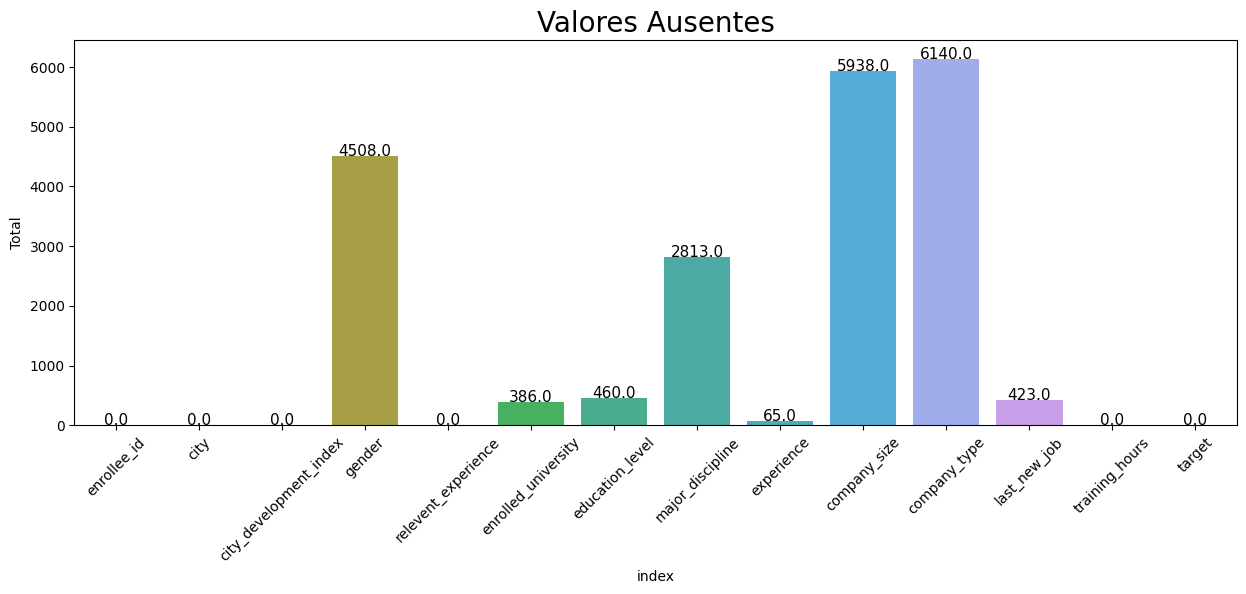

In [157]:
#Plotando para melher visualização 

ax = plt.figure(figsize = (15, 5))

ax = sns.barplot (x = null_df['index'], y = null_df['Total'])
plt.title('Valores Ausentes', fontsize = 20)
plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()


> Conforme informações acima, não encontramos valores duplicados, porém temos valores ausentes nesse conjunto de dado. Assim, varei uma tratativas nesses valores ausentes, para nelhor analise dos dados.

## Limpeza e Processamento dos Dados

> Criando um novo DataFrame, para não prejudicar os dados originais.

In [259]:
new_df = df.copy()

In [260]:
new_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Tratando da Variável major_discipline

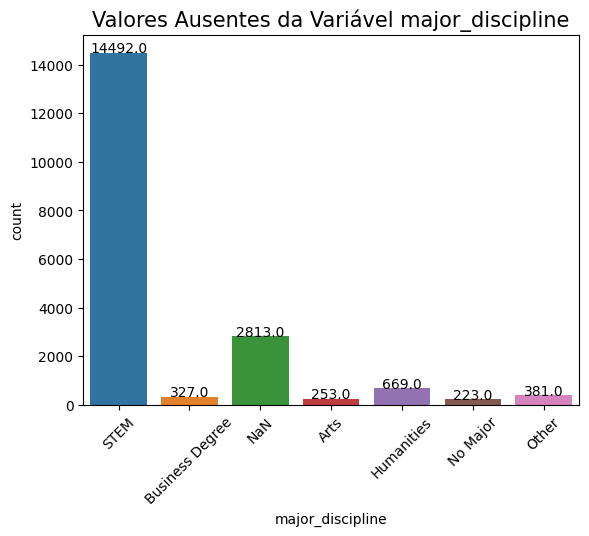

In [261]:
# Grafico com os Valores Ausentes da Variável major_discipline 

sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável major_discipline", fontsize = 15)
plt.show()

In [262]:
# Relação entre major_discipline x education_level
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)

High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

> Conforme a relação entre major_discipline x education_level, podemos identificar que 2325 dos valores ausentes da variável major_discipline, são candidatos com nível de escolaridade de Ensino Médio (High School) ou Escola Primária(Primary School), que pela lógica, não podem ter graduação superior. Com isso, preencherei esses os valores NaN da variável 'major_discipline' com 'Non Degree'.

In [263]:
# Criando o índice
nan_index = (new_df[(new_df['major_discipline'].isna()) & 
             ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index


In [264]:
# Imputando os valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [265]:
new_df['major_discipline'].value_counts(dropna = False)

STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

>Para os valores ausentes restantes preencherei com 'Other'.

In [266]:
nan_index = new_df[(new_df['major_discipline'].isna())].index

In [267]:
new_df['major_discipline'][nan_index] = 'Other'

In [268]:
new_df['major_discipline'].value_counts(dropna = False)

STEM               14492
Non Degree          2785
Humanities           669
Other                409
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

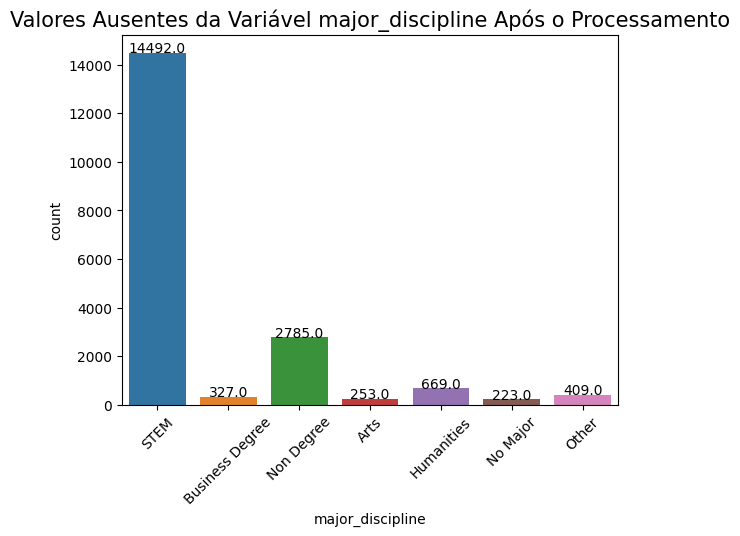

In [269]:
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável major_discipline Após o Processamento", fontsize = 15)
plt.show()

### Tratando da Variável enrolled_university

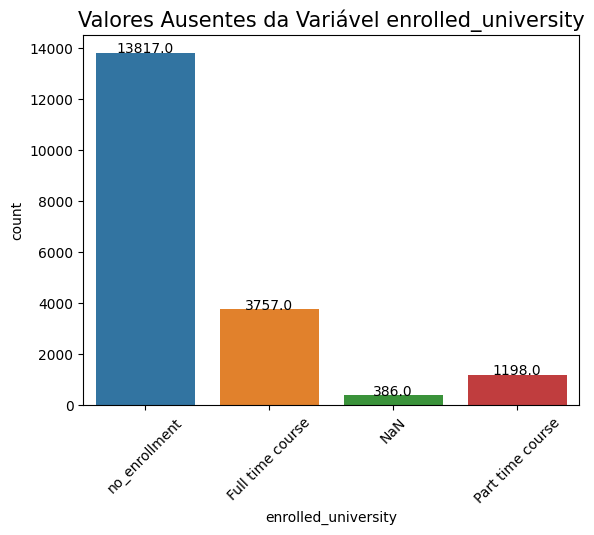

In [270]:
# Grafico com os Valores Ausentes da Variável enrolled_university 

sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável enrolled_university", fontsize = 15)
plt.show()

In [271]:
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

>Candidatos com 'Primary School' como 'education_level' não estão qualificados para ingressar na universidade. Portanto, preencherei valores 'NaN' em 'education_level' como 'Primary Grad'.

In [272]:
# Criando o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['enrolled_university'] == 'Primary School')]).index

In [273]:
# Imputando os valor ausente
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [274]:
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

>Para os valores ausentes restantes preencherei com 'Other' também.

In [275]:
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [276]:
new_df['enrolled_university'][nan_index] = 'Other'

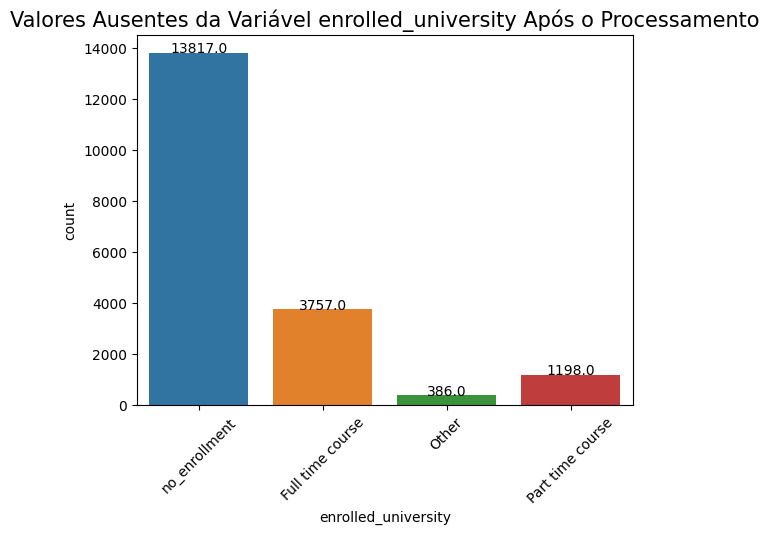

In [277]:

sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável enrolled_university Após o Processamento", fontsize = 15)
plt.show()

### Tratando a Variável company_type

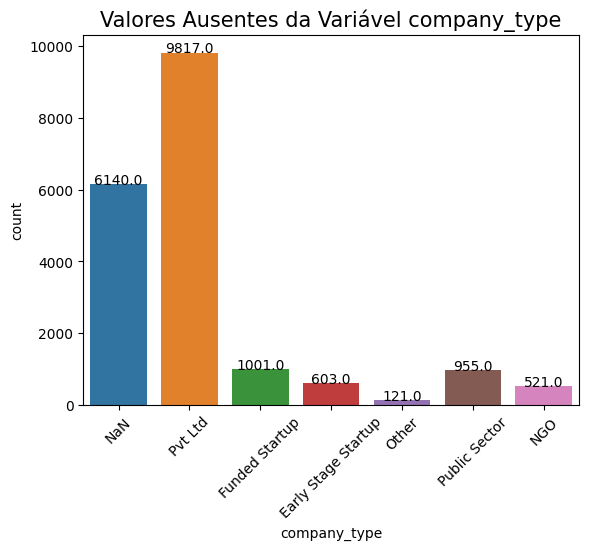

In [278]:
sns.countplot(data = new_df.fillna('NaN'), x = 'company_type')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável company_type", fontsize = 15)
plt.show()

In [279]:
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

> Como não podemos identificar os valores ausentes do 'company_type' inserido como 'Other'

In [280]:
nan_index = new_df[(new_df['company_type'].isna())].index

In [281]:
new_df['company_type'][nan_index] = 'Other'

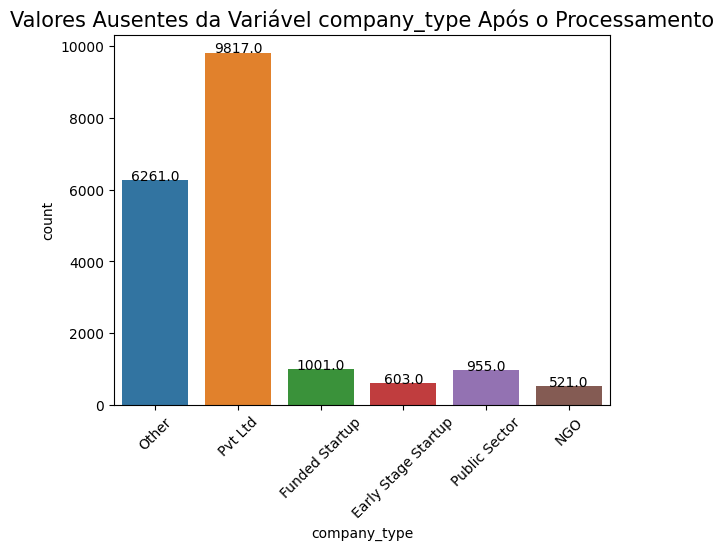

In [282]:
sns.countplot(data = new_df.fillna('NaN'), x = 'company_type')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável company_type Após o Processamento", fontsize = 15)
plt.show()

### Tratando a Variável education_level

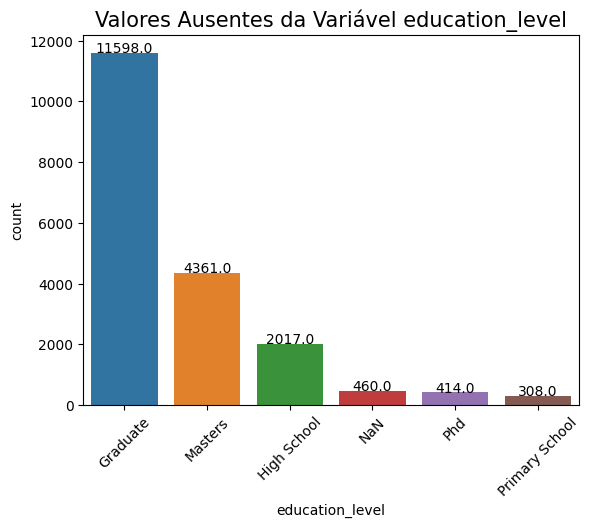

In [283]:
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável education_level", fontsize = 15)
plt.show()

> Como não podemos identificar os valores ausentes do 'education_level' inserido como 'Other'

In [284]:
nan_index = new_df[(new_df['education_level'].isna())].index

In [285]:
new_df['education_level'][nan_index] = 'Other'

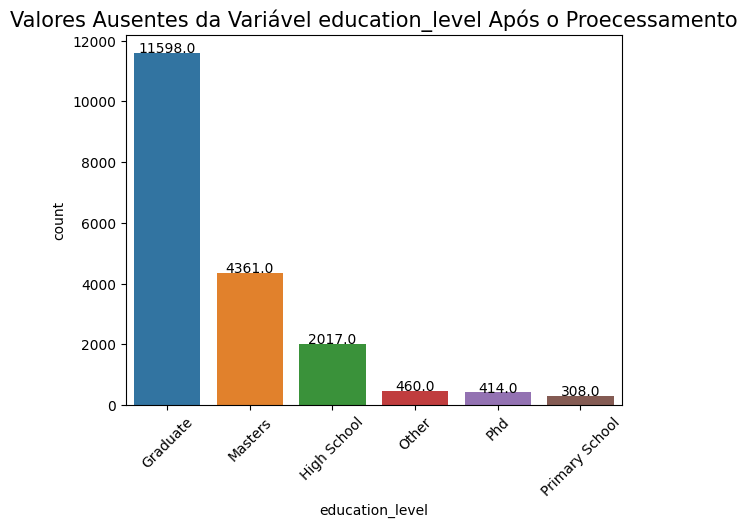

In [286]:
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável education_level Após o Proecessamento", fontsize = 15)
plt.show()

### Tratando a Variável experience

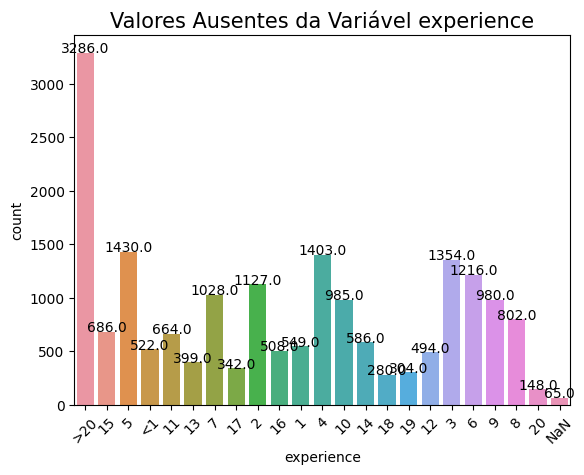

In [287]:
sns.countplot(data = new_df.fillna('NaN'), x = 'experience')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável experience", fontsize = 15)
plt.show()

In [288]:
percent = new_df.isnull().sum() / len(new_df) * 100
percent['experience']

0.33928385008873574

>Como o percentual de valores ausentes na variável 'experience' é menos que 0,5%, deletarei essas linhas com valores ausentes.

In [309]:
new_df = new_df.dropna(subset = ['experience'])

In [310]:
percent = new_df.isnull().sum() / len(new_df) * 100
percent['experience']

0.0

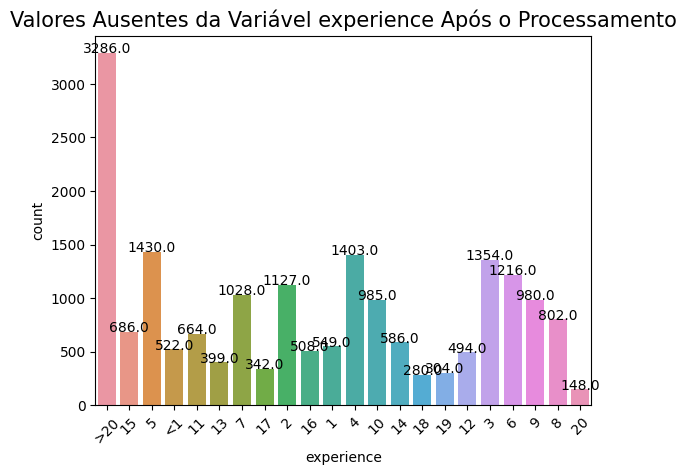

In [313]:
sns.countplot(data = new_df.fillna('NaN'), x = 'experience')
plt.xticks(rotation = 45)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável experience Após o Processamento", fontsize = 15)
plt.show()

> Para as variáveis 'gender', 'company_size', 'last_new_job' tera tratativa nos sues valures ausentes, pois acredito que essas variáveis não haverá interferencia na analise.

# Retorno para Análise Exploratória de Dados

In [314]:
new_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,Other,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [316]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19093 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19093 non-null  int64  
 1   city                    19093 non-null  object 
 2   city_development_index  19093 non-null  float64
 3   gender                  14634 non-null  object 
 4   relevent_experience     19093 non-null  object 
 5   enrolled_university     19093 non-null  object 
 6   education_level         19093 non-null  object 
 7   major_discipline        19093 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13178 non-null  object 
 10  company_type            19093 non-null  object 
 11  last_new_job            18694 non-null  object 
 12  training_hours          19093 non-null  int64  
 13  target                  19093 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [321]:
#Estátistica dos dados numéricos
new_df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19093.000000,19093.000000
mean,0.829045,65.345257
std,0.123260,60.051868
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* Em 'city_development_index' (CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Com isso, dizer que a maioria dos candidatos é de cidades bem desenvolvidas.


* Em 'training_hours', os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

#### Verificando a Distribuição das Variáveis Numéricas

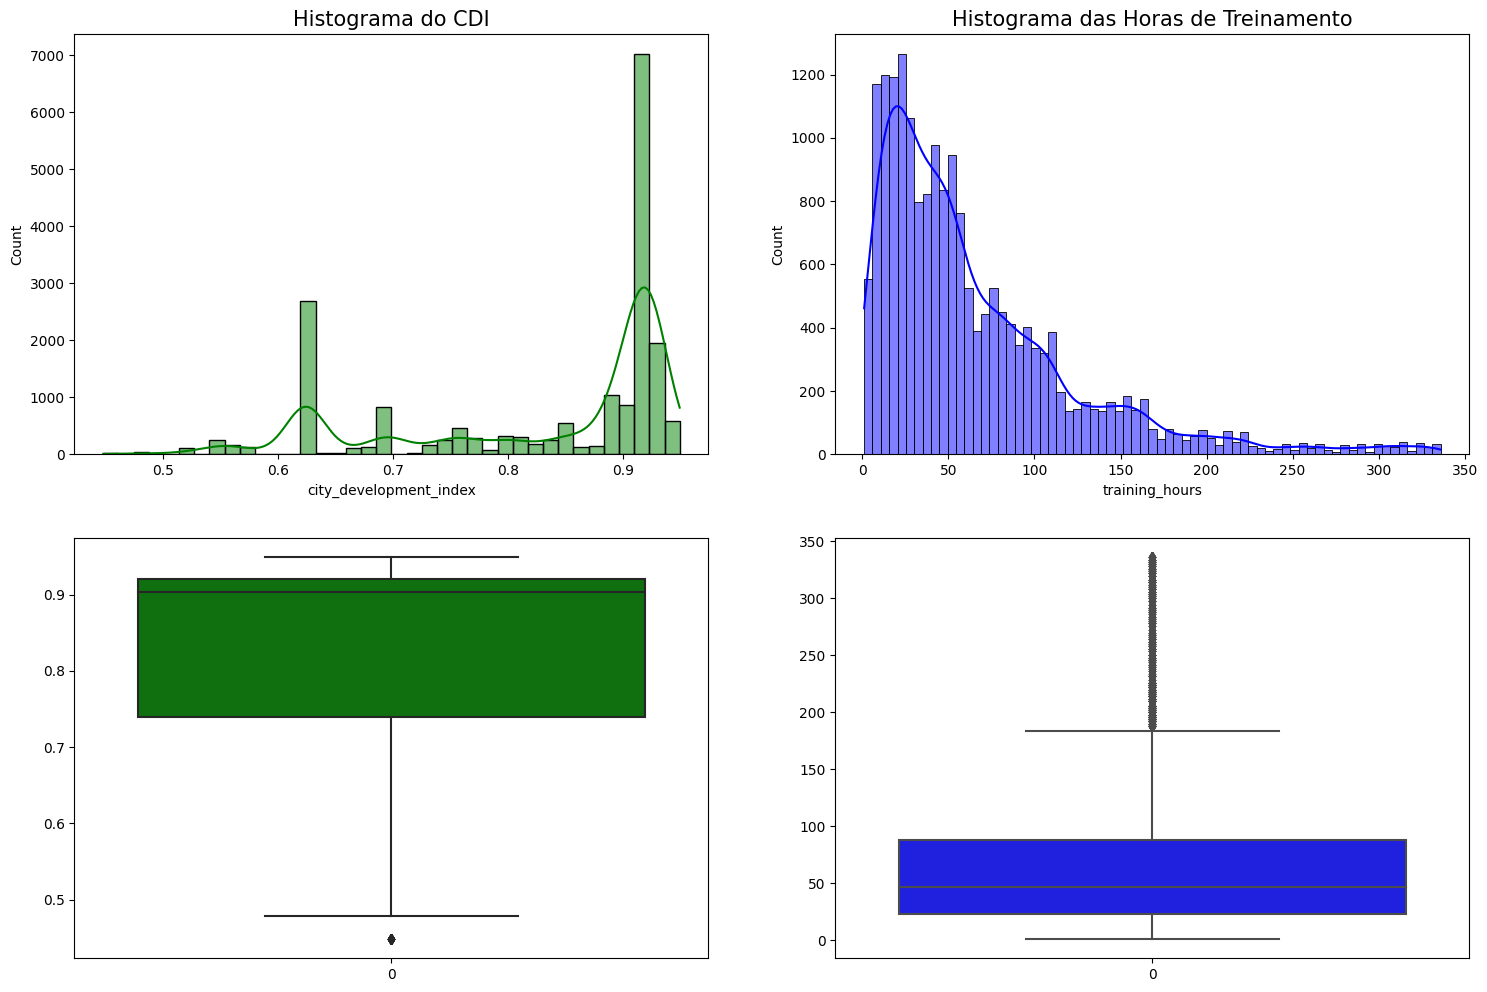

In [327]:
#Graficos de histogramas e boxplots para analise de distribuição e outliers
plt.figure(figsize = (18,12))

plt.subplot(221)
sns.histplot(new_df['city_development_index'], kde = True, color = 'green')
plt.title('Histograma do CDI', fontsize = 15)

plt.subplot(222)
sns.histplot(new_df['training_hours'], kde = True, color = 'blue')
plt.title('Histograma das Horas de Treinamento', fontsize = 15)

plt.subplot(223)
sns.boxplot(new_df['city_development_index'], color = 'green')


plt.subplot(224)
sns.boxplot(new_df['training_hours'], color = 'blue')


plt.show()

In [331]:
# Teste de Normalidade da Distribuição
numerical_feature = ['city_development_index', 'training_hours']

for i in numerical_feature:

    stats, pval = normaltest(new_df[i])
    
    if pval > 0.05:
        print(i, ': Distribuição Normal')

    else:
        print(i, ': Distribuição Não Nomal')




city_development_index : Distribuição Não Nomal
training_hours : Distribuição Não Nomal


* Conforme o grafico de Histograma do CDI, podemos dizer que a variável 'city_development_index' é Bimodal.
  
* As variáveis 'city_development_index' e 'training_hours' não seguem a distribuição normal. Para a análise numérica, irei utilizar um método não paramétrico.

* Os Dados de 'training_hours' estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado, pois  as pessoas geralmente ficam animadas ao fazer o treinamento no início, mas nem todos que começam conseguem terminar.


### Correlação dos Dados

In [332]:
new_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,Other,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


> Notado aqui, que as variáveies 'experience' e 'last_new_job' são variáveis categóricas, porém tranformarei em numéricas, para melhor analisar

In [333]:
new_df["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [337]:
# Convertemos a variável experience para numérica
new_df['experience'] = np.where(new_df['experience'] == '<1', 1, new_df['experience'])
new_df['experience'] = np.where(new_df['experience'] == '>20', 21, new_df['experience'])
new_df['experience'] = new_df['experience'].astype(float)

In [340]:
new_df["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [341]:
new_df["last_new_job"].value_counts()

1        8019
>4       3283
2        2897
never    2444
4        1028
3        1023
Name: last_new_job, dtype: int64

In [342]:
new_df['last_new_job'] = np.where(new_df['last_new_job'] == 'never', 0, new_df['last_new_job'])
new_df['last_new_job'] = np.where(new_df['last_new_job'] == '>4', 5, new_df['last_new_job'])
new_df['last_new_job'] = new_df['last_new_job'].astype(float)

In [343]:
new_df["last_new_job"].value_counts()

1.0    8019
5.0    3283
2.0    2897
0.0    2444
4.0    1028
3.0    1023
Name: last_new_job, dtype: int64

In [344]:
new_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,Other,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,Other,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,Other,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [345]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19093 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19093 non-null  int64  
 1   city                    19093 non-null  object 
 2   city_development_index  19093 non-null  float64
 3   gender                  14634 non-null  object 
 4   relevent_experience     19093 non-null  object 
 5   enrolled_university     19093 non-null  object 
 6   education_level         19093 non-null  object 
 7   major_discipline        19093 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13178 non-null  object 
 10  company_type            19093 non-null  object 
 11  last_new_job            18694 non-null  float64
 12  training_hours          19093 non-null  int64  
 13  target                  19093 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

> Utilizarei a Correlação de Spearman Entre Variáveis Numéricas

In [348]:
new_df.drop('enrollee_id', axis = 1).corr('spearman')

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182197,0.007886,-0.278800
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182197,0.473284,1.000000,0.003046,-0.082708
training_hours,0.007886,0.003569,0.003046,1.000000,-0.014330
target,-0.278800,-0.183721,-0.082708,-0.014330,1.000000


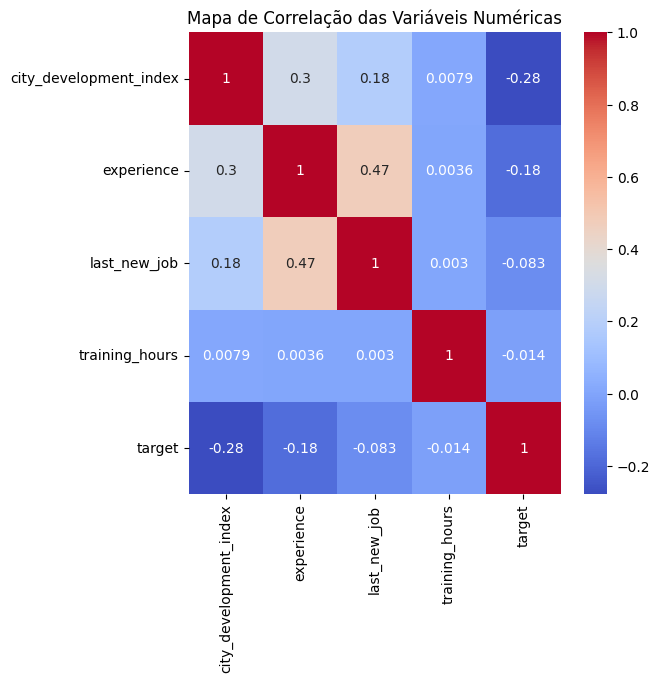

In [359]:
# Criação de Heatmap para melhor visualização
plt.figure(figsize = (6,6))
sns.heatmap(new_df.drop('enrollee_id', axis = 1).corr('spearman'), annot = True, cmap = 'coolwarm')
plt.title('Mapa de Correlação das Variáveis Numéricas')
plt.show()



Pela correlação de spearman acima, 'last_new_job' e 'experience' têm correlação média (0,47), enquanto outros têm correlação fraca.

As variáveis 'last_new_job' e 'training_hours' tem correlação próxima de zero com a variável alvo e poderiam ser descartadas.


> Para a relação entre as variáveis categóricas e a variável alvo, usarei WOE e IV.

<Figure size 1200x1000 with 0 Axes>

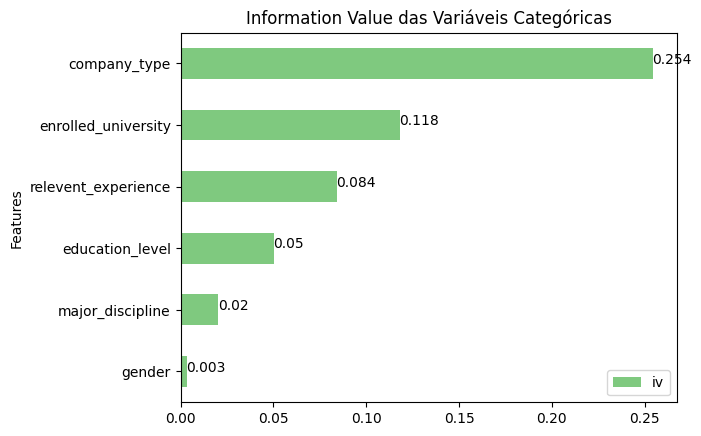

In [375]:

columns_cat = new_df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns


iv = []


for i in columns_cat:
    df_woe_iv = (pd.crosstab(new_df[i], new_df['target'], normalize = 'columns')
                 .assign(woe = lambda new_dfx: np.log(new_dfx[1] / new_dfx[0]))
                 .assign(iv = lambda new_dfx: np.sum(new_dfx['woe']*(new_dfx[1]-new_dfx[0]))))
    iv.append(df_woe_iv['iv'][0])


df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (12,10))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()


No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
Com base em seu valor IV, 'enrolled_university' e 'company_type' são preditores médio, 'relevent_experience' e 'education_level' são preditores fracos e os outros são inúteis para a previsão.

## Relatório Final

Com base na análise dos dados, podemos observar que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade(city_ development _index), onde mora o candidato.
- Tempo de experiência profissional(experience).
- Se está ou não matriculado em um curso universitário(enrolled_university).
- Se tem ou não experiência relevante(relevent_experience).
- O nível educacional(education_level).
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente(company_type).
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato(enrollee_id).
- O código da cidade do candidato(city).
- O gênero(gender).
- A última vez que o candidato esteve empregado(lastnewjob).
- O tamanho da empresa(company_size).
- Total de horas de treimamento(training_hours).


**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto, porque muitas pessoas não precisam de muito tempo para concluir o treinamento.